# The Battle of the Neighborhoods - Austin a post COVID - 19 small business opportunity !

This applied Data Science project aims to use the Data Science and Machine Learning concepts learned during the IBM Data Science Professional Certificate Course. The objective of this project is to use the Austin neighborhood, restaurant and demographics data to asses which Austin neighborhood is most ideal to open a Chinese Restaurant post COVID - 19!

I Plan to have the following sections in my Final Project:
1. Problem Definition
2. Data Curation and Data Wrangling (using Foursquare & Google APIs)
3. Using Machine Learning to cluster neighborhoods
4. Visualizing the data using Folium maps.
5. Summary
6. Conclusion.

## Introduction

Austin the capital of texas is being one of the fastest growing cities in America. Also due to COVID - 19 and the remote work culture, we are seeing that a lot of companies are not only offerring working remotely but are also moving their operations to Texas (primarily near austix area). Celebrities and socially influential people like Elon Musk, CEO - SPACEX, TESLA, BORING, NEURALINK; is also one of the people migrating to Austix, Texas. In short Austin is becoming one hot spot of opportunities and there is a lot of migration taking place to Austix especially from California Silicon Valley.

In additional to this Austin was recently voted the No. 1 place to live in America for the third year in a row (U.S. News & World Report) and was ranked No.4 of the best large cities to start a business (WalletHub). According to Austin City Government, the City of Austin has crossed the threshold of becoming a Majority-Minority city, meaning that no demographic group exists as a majority of the City's population. One notable trend is the growing number of Latino and Asian households.

Being a fast-growing city with diverse ethnicities, Austin is a great place for entrepreneurs to start and grow their business. The city is also well known for its outstanding food and great live music venues.

## Business Problem

Having lived in Bay Area for more than a decade and frequently travelling to Austix for work, I have always wondered why there aren't many authentic Chinese restaurants in the Austin area as compared to the Bay Area and now that the is a lot of migration happening from The Bay Area to Austin, is this a potential business opportunity to be open a Chinese Restaurant to server all these newly relocating people as they for sure will be missing the authentic chinese food that is available in the Bay Area. The objective of this project is to segment and cluster the neighborhoods of Austin using different data sources including Foursquare location data to find the 'best' neighborhood to open a Chinese restaurant based on the venues in the area.

## Target Audience

The target audience of this project would be anyone that is interested in opening or growing a Chinese restaurant in Austin, TX. The cluster analysis of Austin neighborhoods and demographic data will help entrepreneurs make an informed decision about which neighborhoods to aim for based of the frequency of people visting chinese restaurants in a given neighborhood.

## Data Acquisation and Curation:
To begin with, I gathered data on the reporting neighborhoods in the city of Austin. The neighborhood data I found is from the Housing and Planning Department of the Austin City Government: https://data.austintexas.gov/Building-and-Development/Neighborhoods/a7ap-j2yt; https://www.austintexas.gov/page/demographic-data; these datasets includes the names and geometric information of the different neighborhoods, and their sizes and shapes. As Part of this project I plan to use not only the Foursquare API's "explore" endpoint from this course to get near by venue information, but also demonstarte the use of Google API to gather latitude and longtitude information.

In [6]:
!pip install beautifulsoup4
!pip install lxml
!pip install folium==0.5.0
!pip install -U scikit-learn
!pip install -U scipy

import requests # library to handle requests
import pandas as pd # library for data analsysis
import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import urllib.request

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
import json # library to handle JSON files
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

from bs4 import BeautifulSoup
from sklearn.cluster import KMeans

# Data visualization modules
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist

print('Folium installed')
print('Libraries imported.')

Requirement already up-to-date: scikit-learn in /opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages (0.24.1)
Requirement already up-to-date: scipy in /opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages (1.6.0)
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                                                                           /failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - cffi -> python[version='2.7.*|3.5.*|3.6.*|3.6.12|3.6.12|>=3.6,<3.7.0a0|>=

kiwisolver -> libgcc-ng[version='>=7.2.0|>=7.3.0|>=7.5.0|>=9.3.0']
h5py -> libgcc-ng[version='>=4.9|>=7.3.0|>=7.5.0|>=7.2.0']
openssl -> libgcc-ng[version='>=4.9|>=7.3.0|>=7.5.0|>=9.3.0|>=7.2.0']
brotlipy -> libgcc-ng[version='>=4.9|>=7.3.0|>=7.5.0|>=9.3.0']
pyyaml -> libgcc-ng[version='>=4.9|>=7.3.0|>=7.5.0|>=9.3.0|>=7.2.0']
gstreamer -> libgcc-ng[version='>=4.9|>=7.3.0|>=7.5.0|>=9.3.0|>=7.2.0']
pcre -> libgcc-ng[version='>=4.9|>=7.3.0|>=7.2.0']
libpng -> libgcc-ng[version='>=4.9|>=7.3.0|>=7.5.0|>=7.2.0']
libpq -> libgcc-ng[version='>=4.9|>=7.3.0|>=7.5.0|>=9.3.0|>=7.2.0']
matplotlib -> libgcc-ng[version='>=7.2.0|>=7.3.0']
yarl -> libgcc-ng[version='>=4.9|>=7.3.0|>=7.5.0|>=9.3.0|>=7.2.0']

Package python_abi conflicts for:
chardet -> python_abi[version='2.7.*|3.6|3.6.*|3.7.*|3.9.*|3.8.*|3.7',build='*_pypy37_pp73|*_pypy36_pp73|*_cp39|*_cp37m|*_cp38|*_cp36m|*_cp27mu']
multidict -> python_abi[version='3.6.*|3.6|3.7.*|3.8.*|3.7|3.9.*',build='*_cp39|*_pypy36_pp73|*_cp38|*_cp37m|*_pypy37_pp7

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                                                    -failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - cffi -> python[version='2.7.*|3.5.*|3.6.*|3.6.12|3.6.12|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.9,<3.10.0a0|>=3.8,<3.9.0a0|3.7.9|3.6.9|3.6.9|3.6.9|>=2.7,<2.8.0a0|3.6.9|>=3.5,<3.6.0a0|3.4.*',build='0_73_pypy|2_73_pypy|5_73_pypy|4_73_pypy|3_73_pypy|1_73_pypy']
  - rsa -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']

Your python: python=3.7

If python is on the left-most side of the chain, that's the version you've asked for.
When python 

aiohttp -> pypy3.7[version='>=7.3.3']
yarl -> pypy3.7[version='>=7.3.3']
wrapt -> pypy3.7[version='>=7.3.3']
jedi -> pypy3.7[version='>=7.3.3']
cytoolz -> pypy3.7[version='>=7.3.3']
chardet -> pypy3.7[version='>=7.3.3']
jupyter_core -> pypy3.7[version='>=7.3.3']
pandas -> pypy3.7[version='>=7.3.3']
tornado -> pypy3.7[version='>=7.3.3']
nbconvert -> pypy3.7[version='>=7.3.3']
bokeh -> pypy3.7[version='>=7.3.3']
future -> pypy3.7[version='>=7.3.3']
pyrsistent -> pypy3.7[version='>=7.3.3']
matplotlib-base -> pypy3.7[version='>=7.3.3']
docutils -> pypy3.7[version='>=7.3.3']
sympy -> pypy3.7[version='>=7.3.3']
mock -> pypy3.7[version='>=7.3.3']
matplotlib -> pypy3.7[version='>=7.3.3']
cffi -> pypy3.7=7.3.3
pywavelets -> pypy3.7[version='>=7.3.3']
cx_oracle -> pypy3.7[version='>=7.3.3']
protobuf -> pypy3.7[version='>=7.3.3']
markupsafe -> pypy3.7[version='>=7.3.3']
keyring -> pypy3.7[version='>=7.3.3']
setuptools -> pypy3.7[version='>=7.3.3']
certifi -> pypy3.7[version='>=7.3.3']
secretstora

Folium installed
Libraries imported.


### Data Sources

In [171]:
df = pd.read_csv('https://data.austintexas.gov/api/views/a7ap-j2yt/rows.csv?accessType=DOWNLOAD&bom=true&format=true')
df.head()

,the_geom,FID,TARGET_FID,NEIGHNAME,SqMiles,Shape_Leng,Shape__Area,Shape__Length
0,MULTIPOLYGON (((-97.792307359674 30.4567073495...,3,3,ANDERSON MILL,8.669086,"154,458.20539","241,680,242.267578","154,458.205389751"
1,MULTIPOLYGON (((-97.670762852964 30.3085399639...,95,95,WINDSOR PARK,2.383074,"40,527.3786538","66,436,277.0703125","40,527.378653837"
2,MULTIPOLYGON (((-97.753526659646 30.2387648363...,19,19,DAWSON,0.495535,"17,697.9249978","13,814,726.0859375","17,697.9249977919"
3,MULTIPOLYGON (((-97.738154269236 30.3027463827...,91,91,WEST UNIVERSITY,0.738442,"24,981.0444757","20,586,577.0566406","24,981.0444756827"
4,MULTIPOLYGON (((-97.682624533084 30.2858668623...,49,49,MLK,1.545283,"33,470.4154302","43,080,006.4707031","33,470.4154301564"


In [172]:
df.shape

(103, 8)

In [173]:
# dropping irrelevant data

df = df.drop(['FID', 'TARGET_FID', 'SqMiles', 'Shape_Leng', 'Shape__Area', 'Shape__Length'], axis = 1)
df.head()

,the_geom,NEIGHNAME
0,MULTIPOLYGON (((-97.792307359674 30.4567073495...,ANDERSON MILL
1,MULTIPOLYGON (((-97.670762852964 30.3085399639...,WINDSOR PARK
2,MULTIPOLYGON (((-97.753526659646 30.2387648363...,DAWSON
3,MULTIPOLYGON (((-97.738154269236 30.3027463827...,WEST UNIVERSITY
4,MULTIPOLYGON (((-97.682624533084 30.2858668623...,MLK


In [174]:
# Adding Austin, TX, USA to the neighborhood names to ensure google maps gets the correct data 

df['NEIGHNAME'] = df['NEIGHNAME'] + ', Austin, TX, USA'
df['NEIGHNAME'] = df['NEIGHNAME'].replace(['BLUFF SPRINGS, Austin, TX, USA'],'BLUFF SPRINGS, TX, USA')
df['NEIGHNAME'] = df['NEIGHNAME'].replace(['MANSFIELD--RIVER PLACE, Austin, TX, USA'],'RIVER PLACE, Austin, TX, USA')
df['NEIGHNAME'] = df['NEIGHNAME'].replace(['HAYS WARTHA, Austin, TX, USA'],'HAYS WARTHA, TX, USA')

In [175]:
df.head()

,the_geom,NEIGHNAME
0,MULTIPOLYGON (((-97.792307359674 30.4567073495...,"ANDERSON MILL, Austin, TX, USA"
1,MULTIPOLYGON (((-97.670762852964 30.3085399639...,"WINDSOR PARK, Austin, TX, USA"
2,MULTIPOLYGON (((-97.753526659646 30.2387648363...,"DAWSON, Austin, TX, USA"
3,MULTIPOLYGON (((-97.738154269236 30.3027463827...,"WEST UNIVERSITY, Austin, TX, USA"
4,MULTIPOLYGON (((-97.682624533084 30.2858668623...,"MLK, Austin, TX, USA"


In [176]:
# Get latitude and longtitude coordinates from Google Geocoding API 
!pip install googlemaps

import googlemaps

In [177]:
gmaps_key = googlemaps.Client(key = '')

In [178]:
df['LAT'] = None
df['LON'] = None

for i in range(0, len(df), 1):
    geocode_result = gmaps_key.geocode(df.iat[i,1])
    try:
        lat = geocode_result[0]['geometry']['location']['lat']
        lon = geocode_result[0]['geometry']['location']['lng']
        df.iat[i, df.columns.get_loc('LAT')]= lat
        df.iat[i, df.columns.get_loc('LON')]= lon
    except:
        lat = None
        lon = None

In [179]:
df = df.drop(['the_geom'], axis = 1)

In [180]:
df.head()

,NEIGHNAME,LAT,LON
0,"ANDERSON MILL, Austin, TX, USA",30.4549,-97.8058
1,"WINDSOR PARK, Austin, TX, USA",30.3105,-97.6901
2,"DAWSON, Austin, TX, USA",30.233,-97.7614
3,"WEST UNIVERSITY, Austin, TX, USA",30.2915,-97.7457
4,"MLK, Austin, TX, USA",30.2837,-97.6962


In [181]:
df.shape

(103, 3)

### Exploring Neighborhoods

After finding the latitudes and longitutdes of the neighborhoods, we can then use Folium to map out all these neighborhoods:

In [182]:
# create map of Austin using latitude and longitude values
map_austin = folium.Map(location=[30.2672, -97.7431], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(df['LAT'], df['LON'], df['NEIGHNAME']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#FF0000',
        fill_opacity=0.9,
        parse_html=False).add_to(map_austin)  
    
map_austin

In [35]:
map_austin.save('map_austin.html')

Now it's time to find the venues around the center of these neighborhoods. I will request this data from Foursquare API and collect information for the top 100 venues in the neighborhoods within a radius of 1500 meters

In [40]:
# Create function that gets the top 100 venues that are in the neighbourhoods within a radius of 1500 meters 
def getNearbyVenues (names, latitudes, longitudes, radius= 1500):
    CLIENT_ID = '' # your Foursquare ID
    CLIENT_SECRET = '' # your Foursquare Secret
    VERSION = '20180604'
    LIMIT = 30
    
    venue_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venue_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venue_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [41]:
austin_venues = getNearbyVenues(names=df['NEIGHNAME'],
                                  latitudes=df['LAT'],
                                  longitudes=df['LON']
                                  )

ANDERSON MILL, Austin, TX, USA
WINDSOR PARK, Austin, TX, USA
DAWSON, Austin, TX, USA
WEST UNIVERSITY, Austin, TX, USA
MLK, Austin, TX, USA
SOUTH RIVER CITY, Austin, TX, USA
MLK-183, Austin, TX, USA
OLD WEST AUSTIN, Austin, TX, USA
BOULDIN CREEK, Austin, TX, USA
WALNUT CREEK--PIONEER HILL, Austin, TX, USA
SOUTHEAST, Austin, TX, USA
UNIVERSITY HILLS, Austin, TX, USA
WINDSOR ROAD, Austin, TX, USA
JESTER, Austin, TX, USA
CIRCLE C SOUTH, Austin, TX, USA
WESTGATE, Austin, TX, USA
GALINDO, Austin, TX, USA
BRODIE LANE, Austin, TX, USA
HYDE PARK, Austin, TX, USA
MCKINNEY, Austin, TX, USA
WESTOVER HILLS, Austin, TX, USA
GRACY WOODS, Austin, TX, USA
PLEASANT VALLEY, Austin, TX, USA
SOUTH LAMAR, Austin, TX, USA
PECAN SPRINGS-SPRINGDALE, Austin, TX, USA
FOUR POINTS, Austin, TX, USA
POND SPRINGS, Austin, TX, USA
ST. EDWARDS, Austin, TX, USA
UT, Austin, TX, USA
HIGHLAND, Austin, TX, USA
DOWNTOWN, Austin, TX, USA
HANCOCK, Austin, TX, USA
DITTMAR--SLAUGHTER, Austin, TX, USA
TECH RIDGE, Austin, TX, USA


In [42]:
austin_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"ANDERSON MILL, Austin, TX, USA",30.454922,-97.805843,Millrun Park,30.451548,-97.802975,Park
1,"ANDERSON MILL, Austin, TX, USA",30.454922,-97.805843,Freda's Seafood Grille,30.464196,-97.803776,Seafood Restaurant
2,"ANDERSON MILL, Austin, TX, USA",30.454922,-97.805843,Punch Austin Kettlebell Gym,30.447413,-97.810296,Gym / Fitness Center
3,"ANDERSON MILL, Austin, TX, USA",30.454922,-97.805843,Thundercloud Subs,30.461629,-97.795651,Sandwich Place
4,"ANDERSON MILL, Austin, TX, USA",30.454922,-97.805843,P. Terry's Burger Stand,30.461215,-97.795304,Burger Joint


In [43]:
# Group venues by Neighborhood

austin_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"ALLANDALE, Austin, TX, USA",30,30,30,30,30,30
"ANDERSON MILL, Austin, TX, USA",30,30,30,30,30,30
"AVERY RANCH--LAKELINE, Austin, TX, USA",30,30,30,30,30,30
"BARTON CREEK MALL, Austin, TX, USA",30,30,30,30,30,30
"BARTON HILLS, Austin, TX, USA",30,30,30,30,30,30
"BERGSTROM, Austin, TX, USA",30,30,30,30,30,30
"BLUFF SPRINGS, TX, USA",10,10,10,10,10,10
"BOULDIN CREEK, Austin, TX, USA",30,30,30,30,30,30
"BRENTWOOD, Austin, TX, USA",30,30,30,30,30,30


In [44]:
print('There are {} unique categories.'.format(len(austin_venues['Venue Category'].unique())))

There are 291 unique categories.


### Explore Chinese Restaurants in Austin

Before we get into clustering, we need to create a new dataframe with all the Chinese restaurant data that was returned by Foursquare API. Since some of these venues were double counted, I we will drop them in order to make a map of these restaurants.

In [51]:
chi_food = austin_venues[austin_venues['Venue Category'].str.contains("Chinese Restaurant")]
chi_food.shape

(25, 7)

In [52]:
chi_food

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
294,"UNIVERSITY HILLS, Austin, TX, USA",30.317206,-97.673802,China Kitchen,30.313662,-97.664286,Chinese Restaurant
546,"GRACY WOODS, Austin, TX, USA",30.389061,-97.694156,Rice Bowl Cafe,30.382539,-97.688298,Chinese Restaurant
551,"GRACY WOODS, Austin, TX, USA",30.389061,-97.694156,First Chinese BBQ,30.378445,-97.686712,Chinese Restaurant
568,"GRACY WOODS, Austin, TX, USA",30.389061,-97.694156,TC Noodle House,30.379092,-97.687035,Chinese Restaurant
777,"HIGHLAND, Austin, TX, USA",30.333996,-97.716977,China Family Restaurant,30.333904,-97.716744,Chinese Restaurant
1011,"CHERRY CREEK, Austin, TX, USA",30.197914,-97.824558,China Hill,30.208323,-97.817358,Chinese Restaurant
1015,"CHERRY CREEK, Austin, TX, USA",30.197914,-97.824558,Beijing Wok Chinese Restaurant,30.202054,-97.838377,Chinese Restaurant
1089,"WOOTEN, Austin, TX, USA",30.361058,-97.723299,Din Ho Chinese BBQ,30.361188,-97.715652,Chinese Restaurant
1165,"GARRISON PARK, Austin, TX, USA",30.208818,-97.804702,Hao Hao Restaurant,30.201455,-97.805544,Chinese Restaurant
1170,"GARRISON PARK, Austin, TX, USA",30.208818,-97.804702,China Hill,30.208323,-97.817358,Chinese Restaurant


In [53]:
# Drop duplicates as some were double counted

chi_food = chi_food.drop_duplicates(subset=['Venue Latitude', 'Venue Longitude'], keep='last')

In [54]:
chi_food.shape

(18, 7)

In [55]:
# create map of Austin using latitude and longitude values
chi_map = folium.Map(location=[30.2672, -97.7431], zoom_start=11)

# add markers to map
for lat, lng, name in zip(chi_food['Venue Latitude'], chi_food['Venue Longitude'], chi_food['Venue']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='lightpink',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(chi_map)  
    
chi_map

In [56]:
chi_map.save('map_austin_chinese_restaurants.html')

## One Hot Encoding

Previously, we collected data on venues in Austin with their names and coordinates. However, to run machine learning algorithms on the data, we need numerical data about the existence of these venues. One hot encoding helps us do that by creating new (binary) columns to indicate the presence of each possible value from the original data. This means that each venue in each neighborhood will be labeled as 1 in their correct category. After this, we group the dataframe by the neighborhoods to get the mean of the frequency of occurence of each venue category.

### Analyzing Neighborhoods

In [92]:
# one hot encoding
austin_onehot = pd.get_dummies(austin_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
austin_onehot['Neighborhood'] = austin_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [austin_onehot.columns[-1]] + list(austin_onehot.columns[:-1])
austin_onehot = austin_onehot[fixed_columns]

austin_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Capitol Building,Caribbean Restaurant,Cemetery,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Bookstore,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Service,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fire Station,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop,Fondue Restaurant,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Lighting Store,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Medical Center,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Motel,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,Noodle House,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pizza Place,Playground,Poke Place,Pool,Pool Hall,Pub,Public Art,RV Park,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Restaurant,River,Rock Club,Rugby Pitch,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Storage Facility,Strip Club,Student Center,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Taxi Stand,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toll Plaza,Toy / Game Store,Trade School,Trail,Train Station,Tree,Turkish Restaurant,Vape Store,Vegetarian / Vegan Restaurant,Veter

In [93]:
austin_grouped = austin_onehot.groupby('Neighborhood').mean().reset_index()
austin_grouped.head()

,Neighborhood,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Capitol Building,Caribbean Restaurant,Cemetery,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Bookstore,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Service,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fire Station,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop,Fondue Restaurant,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Lighting Store,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Medical Center,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Motel,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,Noodle House,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pizza Place,Playground,Poke Place,Pool,Pool Hall,Pub,Public Art,RV Park,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Restaurant,River,Rock Club,Rugby Pitch,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Storage Facility,Strip Club,Student Center,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Taxi Stand,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toll Plaza,Toy / Game Store,Trade School,Trail,Train Station,Tree,Turkish Restaurant,Vape Store,Vegetarian / Vegan Restaurant,Veter

In [94]:
austin_grouped.shape

(103, 292)

## Chinese Restaurnant One Hot Encoding

With the previous data frame (austin_grouped), I filtered out on the 'Chinese Restaurant' category. This will tell us the average frequency of occurance of Chinese restaurants in each neighborhood.

In [101]:
chi_res = austin_grouped[['Neighborhood', 'Chinese Restaurant']]
chi_res.head()

,Neighborhood,Chinese Restaurant
0,"ALLANDALE, Austin, TX, USA",0.000000
1,"ANDERSON MILL, Austin, TX, USA",0.000000
2,"AVERY RANCH--LAKELINE, Austin, TX, USA",0.000000
3,"BARTON CREEK MALL, Austin, TX, USA",0.033333
4,"BARTON HILLS, Austin, TX, USA",0.000000


In [102]:
chi_res.shape
chi_cluster_bk = chi_res

## Machine Learning - Cluster Neighborhoods

We are ready to get into machine learning! For this project, I am using k-means clustering. To begin with, a cluster is a collection of data points aggregated together based on their similarities. Using machine learning algorithms, we can cluster the neighborhoods based on their similarities with each other. K-means algorithm, in particular, first identifies k number of centroids, and then allocates every data point to the cluster, in a way that the data point is closer to that cluster's centroid than any other centroid. K-means algorithm runs this in a repetitive fashion before the centroids are stablized and the clusters are formed. I am using this method because it is an unsupervised learning method meaning that the algorithm will find the similarities betwen the data points for us given we don't know them to begin with.

In [103]:
chi_cluster = chi_res.drop('Neighborhood', 1)
chi_cluster.head()

,Chinese Restaurant
0,0.000000
1,0.000000
2,0.000000
3,0.033333
4,0.000000


## Visualize the Average Frequency of Chinese Restaurants of Each Neighborhood

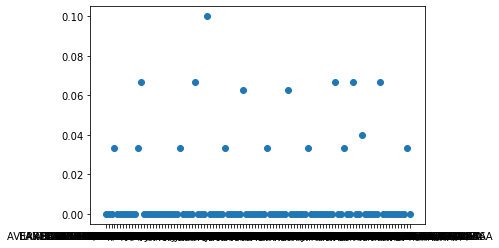

In [104]:
plt.scatter(chi_res['Neighborhood'],chi_res['Chinese Restaurant'])

### Find best K

One limitation of k-means clustering is that the algorithm does not decide how many clusters to form on its own and we need to find the best K to make clustering more accurate. The Elbow Method is one of the most popular methods to determine this optimal value of k. We iterate the values of k from 1 to 10 and calculate the distortion and inertia values for each value of k in the given range. Distortion is the average of the squared distances from the cluster centers of the respective clusters while inertia is the sum of squared distances of samples to their closest cluster center.

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:9: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:10: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:9: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:10: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:9: ConvergenceWarning: Number of distinct clusters (6) found smaller tha

1 : 0.014023941936092023
2 : 0.002937369122406248
3 : 0.0007016361021215496
4 : 0.0002306467355011127
5 : 0.00011558021266759985
6 : 0.0
7 : 0.0
8 : 8.690459355378957e-18
9 : 8.690459355378957e-18


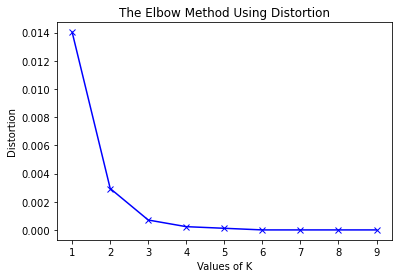

In [105]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(chi_cluster) 
    kmeanModel.fit(chi_cluster)     
      
    distortions.append(sum(np.min(cdist(chi_cluster, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / chi_cluster.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(chi_cluster, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / chi_cluster.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method Using Distortion') 
plt.show()

1 : 0.04325929072276152
2 : 0.006510375816993466
3 : 0.0011072145061728393
4 : 6.430776014109347e-05
5 : 2.4801587301587285e-05
6 : 0.0
7 : 0.0
8 : 9.316686105973253e-33
9 : 1.1483357293408894e-32


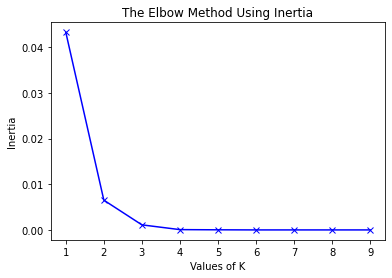

In [106]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 

plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method Using Inertia') 
plt.show()

To determine the optimal number of K, we select the value of k at the “elbow” of the plots, the point after which the distortion/inertia starts decreasing in a linear fashion. Given these plots, we conclude that 4-5 clusters would work best for our data. Ultimately, I decided to go with 5.

### Visualize Scatterplot with the 5 Clusters

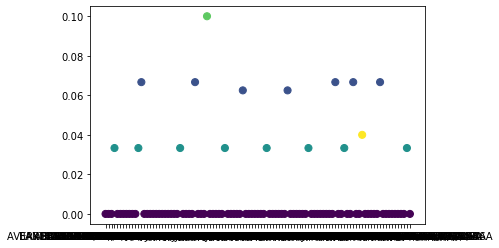

In [107]:
labels = KMeans(5, random_state=0).fit_predict(chi_cluster)
plt.scatter(chi_res['Neighborhood'], chi_res['Chinese Restaurant'], c=labels,
            s=50, cmap='viridis');

### Run K-Means to Cluster Neighborhoods

In [89]:
# Run k-means to cluster neighbourhoods into 4 clusters

# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chi_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[1:10]
labels = kmeans.labels_

In [109]:
print(chi_cluster.shape)
chi_cluster.head()

(103, 1)


,Chinese Restaurant
0,0.000000
1,0.000000
2,0.000000
3,0.033333
4,0.000000


In [110]:
print(chi_res.shape)
chi_res.head()

(103, 2)


,Neighborhood,Chinese Restaurant
0,"ALLANDALE, Austin, TX, USA",0.000000
1,"ANDERSON MILL, Austin, TX, USA",0.000000
2,"AVERY RANCH--LAKELINE, Austin, TX, USA",0.000000
3,"BARTON CREEK MALL, Austin, TX, USA",0.033333
4,"BARTON HILLS, Austin, TX, USA",0.000000


In [114]:
chi_res.head()

,Neighborhood,Chinese Restaurant,Cluster Lables
0,"ALLANDALE, Austin, TX, USA",0.000000,0
1,"ANDERSON MILL, Austin, TX, USA",0.000000,0
2,"AVERY RANCH--LAKELINE, Austin, TX, USA",0.000000,0
3,"BARTON CREEK MALL, Austin, TX, USA",0.033333,2
4,"BARTON HILLS, Austin, TX, USA",0.000000,0


In [115]:
# add clustering labels
#neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

chi_merged = df.rename(columns={"NEIGHNAME": "Neighborhood"})

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
chi_merged = chi_merged.join(chi_res.set_index('Neighborhood'), on='Neighborhood')
#chi_merged["Cluster Labels"] = toronto_merged["Cluster Labels"].round().astype('Int32')
#chi_merged.dropna(inplace=True)
chi_merged.head() # check the last columns!

,Neighborhood,LAT,LON,Chinese Restaurant,Cluster Lables
0,"ANDERSON MILL, Austin, TX, USA",30.4549,-97.8058,0.0,0
1,"WINDSOR PARK, Austin, TX, USA",30.3105,-97.6901,0.0,0
2,"DAWSON, Austin, TX, USA",30.233,-97.7614,0.0,0
3,"WEST UNIVERSITY, Austin, TX, USA",30.2915,-97.7457,0.0,0
4,"MLK, Austin, TX, USA",30.2837,-97.6962,0.0,0


In [116]:
chi_merged.shape

(103, 5)

### Examine Clusters
We created 5 clusters (cluster 0 - 4) using k-means. Now let's look at each cluster more closely.

### Cluster 0
As we can tell from the dataframe below, cluster 0 has an average frequency of Chinese restaurant of 0. It means that Chinese restaurants are not very common in these neighborhoods.

In [118]:
cluster0 = chi_merged.loc[chi_merged['Cluster Lables'] == 0]
cluster0

,Neighborhood,LAT,LON,Chinese Restaurant,Cluster Lables
0,"ANDERSON MILL, Austin, TX, USA",30.4549,-97.8058,0.0,0
1,"WINDSOR PARK, Austin, TX, USA",30.3105,-97.6901,0.0,0
2,"DAWSON, Austin, TX, USA",30.233,-97.7614,0.0,0
3,"WEST UNIVERSITY, Austin, TX, USA",30.2915,-97.7457,0.0,0
4,"MLK, Austin, TX, USA",30.2837,-97.6962,0.0,0
5,"SOUTH RIVER CITY, Austin, TX, USA",30.25,-97.7444,0.0,0
6,"MLK-183, Austin, TX, USA",30.276,-97.6679,0.0,0
7,"OLD WEST AUSTIN, Austin, TX, USA",30.2955,-97.7551,0.0,0
8,"BOULDIN CREEK, Austin, TX, USA",30.2515,-97.7543,0.0,0
9,"WALNUT CREEK--PIONEER HILL, Austin, TX, USA",30.3575,-97.6655,0.0,0


### Cluster 1
Cluster 1 seems to have more Chinese restaurants than Cluster 0

In [119]:
cluster1 = chi_merged.loc[chi_merged['Cluster Lables'] == 1]
cluster1

,Neighborhood,LAT,LON,Chinese Restaurant,Cluster Lables
38,"CHERRY CREEK, Austin, TX, USA",30.1979,-97.8246,0.066667,1
43,"GARRISON PARK, Austin, TX, USA",30.2088,-97.8047,0.066667,1
53,"LBJ, Austin, TX, USA",30.3135,-97.6567,0.062500,1
54,"WEST CONGRESS, Austin, TX, USA",30.2132,-97.7744,0.066667,1
75,"ONION CREEK, Austin, TX, USA",30.1403,-97.7811,0.062500,1
94,"SOUTH MANCHACA, Austin, TX, USA",30.2195,-97.7839,0.066667,1
98,"SWEETBRIAR, Austin, TX, USA",30.1971,-97.7772,0.066667,1


### Cluster 2

So far, Cluster 2 has the highest frequency of Chinese restaurants.

In [121]:
cluster2 = chi_merged.loc[chi_merged['Cluster Lables'] == 2]
cluster2

,Neighborhood,LAT,LON,Chinese Restaurant,Cluster Lables
29,"HIGHLAND, Austin, TX, USA",30.334,-97.717,0.033333,2
41,"WOOTEN, Austin, TX, USA",30.3611,-97.7233,0.033333,2
49,"RMMA, Austin, TX, USA",30.2987,-97.7004,0.033333,2
81,"EAST CONGRESS, Austin, TX, USA",30.2086,-97.7661,0.033333,2
84,"CENTRAL EAST AUSTIN, Austin, TX, USA",30.2716,-97.7249,0.033333,2
86,"BARTON CREEK MALL, Austin, TX, USA",30.2577,-97.8073,0.033333,2
97,"NORTH LAMAR, Austin, TX, USA",30.3458,-97.714,0.033333,2
99,"SPICEWOOD, Austin, TX, USA",30.3715,-97.7542,0.033333,2


### Cluster 3

In [123]:
cluster3 = chi_merged.loc[chi_merged['Cluster Lables'] == 3]
cluster3

,Neighborhood,LAT,LON,Chinese Restaurant,Cluster Lables
21,"GRACY WOODS, Austin, TX, USA",30.3891,-97.6942,0.1,3


### Cluster 4

In [125]:
cluster4 = chi_merged.loc[chi_merged['Cluster Lables'] == 4]
cluster4

,Neighborhood,LAT,LON,Chinese Restaurant,Cluster Lables
11,"UNIVERSITY HILLS, Austin, TX, USA",30.3172,-97.6738,0.04,4


In [126]:
clusters = chi_merged.groupby('Neighborhood').mean()
clusters.head()

,Chinese Restaurant,Cluster Lables
Neighborhood,,
"ALLANDALE, Austin, TX, USA",0.000000,0
"ANDERSON MILL, Austin, TX, USA",0.000000,0
"AVERY RANCH--LAKELINE, Austin, TX, USA",0.000000,0
"BARTON CREEK MALL, Austin, TX, USA",0.033333,2
"BARTON HILLS, Austin, TX, USA",0.000000,0


In [127]:
c0 = clusters.loc[clusters['Cluster Lables'] == 0]
c1 = clusters.loc[clusters['Cluster Lables'] == 1]
c2 = clusters.loc[clusters['Cluster Lables'] == 2]
c3 = clusters.loc[clusters['Cluster Lables'] == 3]
c4 = clusters.loc[clusters['Cluster Lables'] == 4]

In [128]:
print('Cluster 0 has an average frequency of Chinese Restaurants of', c0["Chinese Restaurant"].mean())
print('Cluster 1 has an average frequency of Chinese Restaurants of', c1["Chinese Restaurant"].mean())
print('Cluster 2 has an average frequency of Chinese Restaurants of', c2["Chinese Restaurant"].mean())
print('Cluster 3 has an average frequency of Chinese Restaurants of', c3["Chinese Restaurant"].mean())
print('Cluster 4 has an average frequency of Chinese Restaurants of', c4["Chinese Restaurant"].mean())

Cluster 0 has an average frequency of Chinese Restaurants of 0.0
Cluster 1 has an average frequency of Chinese Restaurants of 0.06547619047619047
Cluster 2 has an average frequency of Chinese Restaurants of 0.03333333333333333
Cluster 3 has an average frequency of Chinese Restaurants of 0.1
Cluster 4 has an average frequency of Chinese Restaurants of 0.04


After looking at each cluster, we can conclude that Cluster 2 has the highest frequency of Chinese restaurants while Cluster 0 has the lowest.

### Chinese Resturant Data with Cluster Labels

In [129]:
chi_f = chi_food.join(chi_res.set_index('Neighborhood'), on='Neighborhood')
chi_f.reset_index(drop = True) 

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Chinese Restaurant,Cluster Lables
0,"GRACY WOODS, Austin, TX, USA",30.389061,-97.694156,Rice Bowl Cafe,30.382539,-97.688298,Chinese Restaurant,0.100000,3
1,"GRACY WOODS, Austin, TX, USA",30.389061,-97.694156,First Chinese BBQ,30.378445,-97.686712,Chinese Restaurant,0.100000,3
2,"GRACY WOODS, Austin, TX, USA",30.389061,-97.694156,TC Noodle House,30.379092,-97.687035,Chinese Restaurant,0.100000,3
3,"CHERRY CREEK, Austin, TX, USA",30.197914,-97.824558,Beijing Wok Chinese Restaurant,30.202054,-97.838377,Chinese Restaurant,0.066667,1
4,"WOOTEN, Austin, TX, USA",30.361058,-97.723299,Din Ho Chinese BBQ,30.361188,-97.715652,Chinese Restaurant,0.033333,2
5,"GARRISON PARK, Austin, TX, USA",30.208818,-97.804702,Hao Hao Restaurant,30.201455,-97.805544,Chinese Restaurant,0.066667,1
6,"GARRISON PARK, Austin, TX, USA",30.208818,-97.804702,China Hill,30.208323,-97.817358,Chinese Restaurant,0.066667,1
7,"RMMA, Austin, TX, USA",30.298683,-97.700371,Bao'd Up,30.298651,-97.704376,Chinese Restaurant,0.033333,2
8,"LBJ, Austin, TX, USA",30.313495,-97.656667,China Kitchen,30.313662,-97.664286,Chinese Restaurant,0.062500,1
9,"UPPER BOGGY CREEK, Austin, TX, USA",30.185885,-97.770565,East Buffet,30.190350,-97.768070,Indian Chinese Restaurant,0.000000,0


### Data Visualization

Let's create a map to examine these clusters further.

In [131]:
map_clusters = folium.Map(location=[30.2672, -97.7431], zoom_start=11)

# set color scheme for the clusters
x = np.arange(5)
ys = [i + x + (i*x)**2 for i in range(5)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
#markers_colors = []
for lat, lng, name, cluster, in zip(chi_merged['LAT'], chi_merged['LON'], chi_merged['Neighborhood'],  
                                            chi_merged['Cluster Lables']):
    label = folium.Popup(name + '- Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        tooltip = name + '- Cluster ' + str(cluster),
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

In [132]:
map_clusters.save('map_clusters.html')

Cluster 0 = Orange Cluster 1 = Red Cluster 2 = Purple Cluster 3 = Blue Cluster 4 = Green

As we see in the map, most Chinese restaurants are located in Clusters 1 - 4, which are include neighborhoods in the northern and southern parts of Austin. Some of the neighborhoods in Cluster 3 (blue) are in central Metropolitan area but Cluster 3 has the second lowest frequency of Chinese restaurants. Overall, Chinese restaurants are concentrated in north and south Austin. This is interesting information so far!

Text(0.5, 1.0, 'Approximate Number of Chinese Restaurants in Each Cluster')

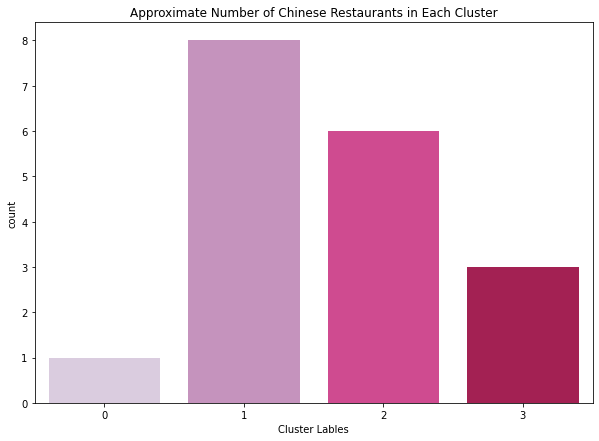

In [133]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (10, 7)

sns.countplot(x=chi_f['Cluster Lables'],data=chi_f, palette = 'PuRd').set_title("Approximate Number of Chinese Restaurants in Each Cluster")

In this graph we can see the approximate number of Chinese restaurants in each cluster. In Cluster 1 there are 15 of them. This is interesting, because cluster 1 doesn't have the highest average frequency of Chinese restaurants. This might be because cluster 1 has a high number of neighborhoods compared to other clusters, and that there are other common venues in the neighborhood which makes the frequency of Chinese restaurants lower.

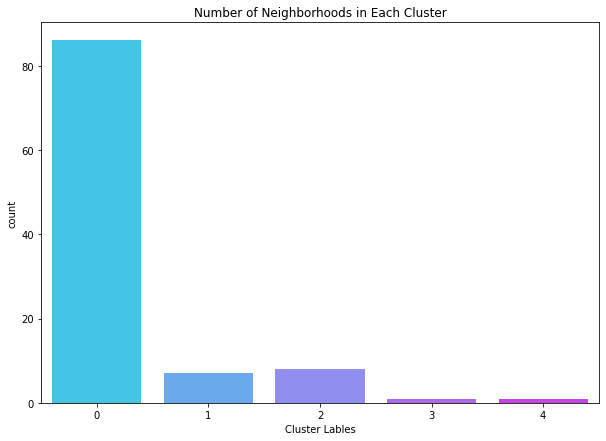

In [135]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (10, 7)

ax = sns.countplot(x=clusters['Cluster Lables'],data=clusters, palette = 'cool').set_title("Number of Neighborhoods in Each Cluster")

In this graph we can see that there are around 90 neighborhoods that don't have a Chinese restaurant within the radius of 1500 meters. This is surprising because of the growing number of Asian population in Austin! Maybe the Chinese population is still small compared to other Asian ethnicities. But we should also note that the Foursquare data only returned the top 100 venues within 1500-meter radius. There might be Chinese restaurants beyond the 100 venue limit and the radius.

### A Look at Demographics in Austin Neighborhoods

Of course there are other things to consider when trying to open a Chinese restaurant... It is a big decision to make! Another factor I would imagine a business owner taking into account is the demographic data based ethnicity. I found a related dataset on austintexas.gov: https://www.austintexas.gov/page/demographic-data, it shows the information on population, race and ethnicity, housing and density, grouped by neighborhood reporting areas in Austin (based on the 2010 Census data). These neighborhoods are the same as the one we did the cluster analysis on. Thus, we can merge the dataframes together to see the neighborhoods with different Asian population densities in their clusters!

In [137]:
import xlrd
demo = pd.read_excel('https://www.austintexas.gov/sites/default/files/files/Planning/Demographics/Neighborhood_Reporting_Areas_Table_I.xlsx',
                   sheet_name = "Table",
                   skiprows = range(1, 17),
                   usecols = "B:H")

In [138]:
demo.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,ALLENDALE,6643,0.831703,0.018967,0.109740,0.018967,0.020623
1,ANDERSON MILL,28473,0.647455,0.033295,0.131107,0.163277,0.024866
2,AVERY RANCH--LAKELINE,14785,0.584850,0.039567,0.140615,0.206628,0.028340
3,BARTON CREEK MALL,5147,0.793472,0.008160,0.092287,0.086652,0.019429
4,BARTON HILLS,8022,0.783720,0.013837,0.135627,0.043381,0.023436


In [139]:
# rename the columns based on Excel sheet

demo = demo.rename(columns={"Unnamed: 1": "Neighborhood", "Unnamed: 2": "Total Population", "Unnamed: 3": "Non-Hispanic White", "Unnamed: 4": "African American", "Unnamed: 5": "Hispanic", "Unnamed: 6": "Asian", "Unnamed: 7": "Other"})

In [148]:
demo.head()

,Neighborhood,Total Population,Non-Hispanic White,African American,Hispanic,Asian,Other
0,ALLENDALE,6643,0.831703,0.018967,0.109740,0.018967,0.020623
1,ANDERSON MILL,28473,0.647455,0.033295,0.131107,0.163277,0.024866
2,AVERY RANCH--LAKELINE,14785,0.584850,0.039567,0.140615,0.206628,0.028340
3,BARTON CREEK MALL,5147,0.793472,0.008160,0.092287,0.086652,0.019429
4,BARTON HILLS,8022,0.783720,0.013837,0.135627,0.043381,0.023436


In [160]:
asian_pop = demo[['Neighborhood', 'Total Population', 'Asian']]

In [161]:
asian_pop.head()

,Neighborhood,Total Population,Asian
0,ALLENDALE,6643,0.018967
1,ANDERSON MILL,28473,0.163277
2,AVERY RANCH--LAKELINE,14785,0.206628
3,BARTON CREEK MALL,5147,0.086652
4,BARTON HILLS,8022,0.043381


In [162]:
chi_2 = chi_merged

In [163]:
# changing the strings to original so the keys are the same 
chi_2['Neighborhood'] = chi_2['Neighborhood'].replace(['BLUFF SPRINGS, TX, USA'], 'BLUFF SPRINGS, Austin, TX, USA')
chi_2['Neighborhood'] = chi_2['Neighborhood'].replace(['RIVER PLACE, Austin, TX, USA'], 'MANSFIELD--RIVER PLACE, Austin, TX, USA')
chi_2['Neighborhood'] = chi_2['Neighborhood'].replace(['HAYS WARTHA, TX, USA'], 'HAYS WARTHA, TX, USA')
chi_2['Neighborhood'] = chi_2['Neighborhood'].replace([', Austin, TX, USA'], '', regex = True)

In [164]:
chi_2.head()

,Neighborhood,LAT,LON,Chinese Restaurant,Cluster Lables
0,ANDERSON MILL,30.4549,-97.8058,0.0,0
1,WINDSOR PARK,30.3105,-97.6901,0.0,0
2,DAWSON,30.233,-97.7614,0.0,0
3,WEST UNIVERSITY,30.2915,-97.7457,0.0,0
4,MLK,30.2837,-97.6962,0.0,0


In [165]:
# Sort population data by higher percentage to lower
asian_sorted = asian_pop.sort_values(by='Asian', ascending=False)
asian_sorted.head()

,Neighborhood,Total Population,Asian
89,UT,7246,0.222192
2,AVERY RANCH--LAKELINE,14785,0.206628
32,GATEWAY,1121,0.196253
94,WEST UNIVERSITY,16408,0.192650
74,SAMSUNG--PIONEER CROSSING,5139,0.190309


In [166]:
# merge population data with cluster data
left = asian_sorted
right = chi_2
result = pd.merge(left, right, on=['Neighborhood'])

In [167]:
result.head(10)

,Neighborhood,Total Population,Asian,LAT,LON,Chinese Restaurant,Cluster Lables
0,UT,7246,0.222192,30.2849,-97.7341,0.000000,0
1,AVERY RANCH--LAKELINE,14785,0.206628,30.4995,-97.7751,0.000000,0
2,GATEWAY,1121,0.196253,30.3907,-97.7395,0.000000,0
3,WEST UNIVERSITY,16408,0.192650,30.2915,-97.7457,0.000000,0
4,SAMSUNG--PIONEER CROSSING,5139,0.190309,30.3621,-97.64,0.000000,0
5,SPICEWOOD,1182,0.187817,30.3715,-97.7542,0.033333,2
6,ANDERSON MILL,28473,0.163277,30.4549,-97.8058,0.000000,0
7,NORTH BURNET,4472,0.156977,30.3911,-97.7218,0.000000,0
8,ROBINSON RANCH,873,0.138603,30.4704,-97.7702,0.000000,0
9,JOLLYVILLE,19103,0.138041,30.4653,-97.7362,0.000000,0


After I sorted and merged the cluster data and the population data, we can now see which clusters the neighborhoods with a high Asian population are in. As we previously discovered, Cluster 0 has the lowest frequency of Chinese restaurants, while Cluster 2 has the highest, Cluster 4 has the second highest, and Cluster 3 has the third highest. From the result we can see that, the top 9 neighborhoods with the highest Asian population percentage actually have some of the lowest frequency of Chinese restaurants. This is surprising! Although I couldn't find the demographic data on Chinese ethnicity specifically, given the data, it seems that there are not many Chinese restaurants in UT/University areas, where there are a lot of Chinese international students.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89]),
 <a list of 90 Text major ticklabel objects>)

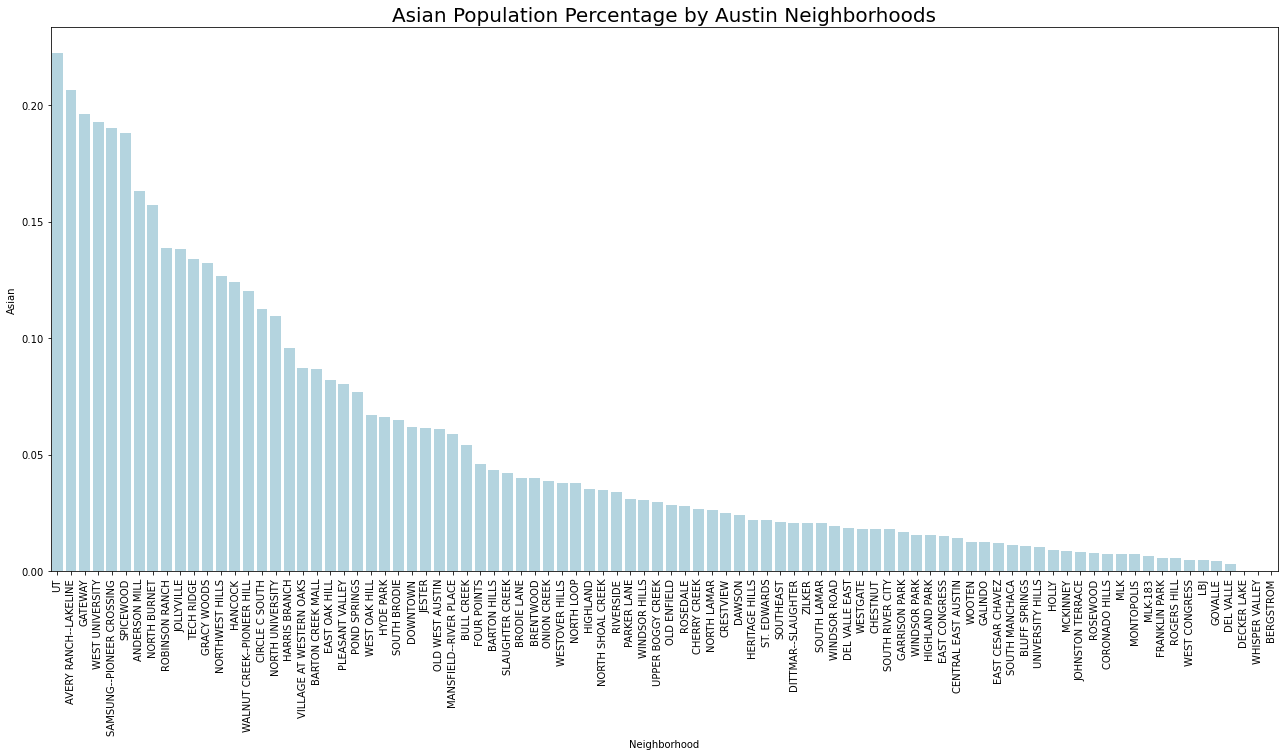

In [168]:
plt.rcParams['figure.figsize'] = (22, 10)
ax1 = sns.barplot(x=result['Neighborhood'], y = result['Asian'], data=result, color = 'lightblue').set_title("Asian Population Percentage by Austin Neighborhoods", fontsize = 20)
plt.xticks(rotation=90)

Heatmap by Asian Population Density in Austin

In [169]:
from folium import plugins
from folium.plugins import HeatMap

asian_population_heatmap = folium.Map(location=[30.2672, -97.7431], zoom_start=11)
# create heatmap layer
heatmap = HeatMap( list(zip(result['LAT'], result['LON'], result["Asian"])),
                   min_opacity=0.2,
                   max_val=result["Asian"].max(),
                   radius=50, blur=50, 
                   max_zoom=1)
# add heatmap layer to base map
heatmap.add_to(asian_population_heatmap)
asian_population_heatmap

In [170]:
asian_population_heatmap.save('asian_population_heatmap.html')

### Summary/Discussion
During our cluster analysis, we found that Cluster 0 has the lowest average frequency of Chinese restaurants while Cluster 2 has the highest. However, Cluster 1 has the highest number of Chinese restaurants, with a lower average frequency, which might be because Cluster 1 has a high number of neighborhoods compared to other clusters, and that there are other common venues in the neighborhood which makes the frequency of Chinese restaurants lower. But all in all, compared to other venues, Cluster 1 doesn't have a high frequency of Chinese restaurants. Based on the demographic data I found, the top 9 neighborhoods with the highest Asian population density don't have a high frequency of Chinese restaurants. These neighborhoods include UT, Lakeline, Gateway, West University, Anderson Mill and so on. It makes sense since some of these neighborhoods have a very small total population. However, highly populated college neighborhoods like UT, West University with many Chinese students don't have a high frequency of Chinese restaurants. Other highly populated neighborhoods like Anderson Mill (with a total population of 28473!) also don't have an average high frequency of Chinese restaurants either. Does this mean that someone should open a Chinese restaurant there?

After discussing the best neighborhood to open a Chinese restaurant, we should also note some limitations to this analysis. To start with, the coordinates of neighborhoods are not 100% accurate. They were taken from Google Geocoding API based on the names. Thus, we could only approximate the location of each neighborhood. Furthermore, I set a limit to the Foursquare API to return only the top 100 venues within the radius of 1500 meters. But the neighborhoods are very different in shapes and sizes. Some neighborhoods are much larger but less populated while others are more densely populated with a smaller area. Thus, the Foursquare API might not have been able to capture all the Chinese restaurants in each neighborhood. However, we calculated the frequency of Chinese restaurants within the 1500 meter radius, which could still reflect the average frequency of Chinese restaurants witin that neighborhood. Lastly, because we don't have specific population data on the Chinese ethnicity, it is hard to tell how much of the Asian population is Chinese. Thus, before opening a restaurant, it might be better to do some research on that specific neighborhood, for example, on its commercial pricing, consumers, competitors, and take other factors into consideration.

### Conclusion
At the start of this project, we defined a business problem: where to open a Chinese restaurant in Austin, TX? Then we collected the neighborhood zoning information from Austin City government and used Google Geocoding API to find the approximate coordinates for those neighborhoods. We then used Foursquare API to discover the 100 venues within the radius of 1500 meters in each neighborhood and took the average frequency of Chinese restaurants in comparison to other venues. Using clustering algorithm, we grouped the neighborhoods in a total of 5 clusters, with Cluster 0 having the lowest average frequency of Chinese restaurants. Finally, we compared the clusters to the neighborhood demographic data provided by the government and found that the neighborhoods with the highest percentages of Asian population don't have a very high frequency of Chinese restaurants. Then I concluded that Anderson Mill is the best neighborhood to open a Chinese restaurant based on our cluster analysis and the demographic data.

Overall, this project was a great practice for me in utilizing data science concepts and machine learning algorithms. I also believe that this project would give our target audience a starting point to consider the possibility and value of a new Chinese restaurant in a given neighborhood in Austin, TX. Our analysis on Austin demographics also gives an idea of where Asian population is concentrated in Austin, which could be one of the factors to consider when opening an Asian or Chinese restaurant. Note that the population data is from the 2010 Census, which means that it is likely that the Asian population has gone up since then, which makes opening a Chinese restaurant even more promising. And plus, everyone loves Chinese food, right?

Hope you found my Applied Data Science Project informative, Thank you for your time!